### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px

In [2]:
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

In [4]:
df = pd.read_csv('data/cleaned_df.csv', index_col = 'Unnamed: 0')

In [5]:
df.head()

,Name,Type,Breed,Color,Sex,Size,Animal ID,Days in Shelter,Intake Type,Intake Subtype,Outcome Type,Intake Condition,Intake Jurisdiction,PredomBreed,PredomColor,DOB,IntakeDate,IntakeAge,IntakeAgeYrs
0,NaN,OTHER,BAT,BROWN,Unknown,SMALL,A384994,0,QUARANTINE,FLD_STRAY,EUTHANIZE,UNKNOWN,*SEBASTOPOL,BAT,BROWN,NaN,2019-03-17,NaN,-1.00
1,NaN,CAT,DOMESTIC SH,CREAM,Female,SMALL,A372719,0,STRAY,FIELD,EUTHANIZE,TREATABLE/REHAB,SANTA ROSA,DOMESTIC SH,CREAM,NaN,2018-05-21,NaN,-1.00
2,NaN,OTHER,BAT,BLACK,Unknown,SMALL,A385008,1,QUARANTINE,FLD_STRAY,EUTHANIZE,UNTREATABLE,SANTA ROSA,BAT,BLACK,NaN,2019-03-18,NaN,-1.00
3,DAISY,CAT,DOMESTIC MH,WHITE/TAN,Spayed,MED,A372551,7,OWNER SURRENDER,OVER THE COUNTER,EUTHANIZE,UNKNOWN,SANTA ROSA,DOMESTIC MH,WHITE,2010-05-15,2018-05-15,2922 days 00:00:00.000000000,8.01
4,NaN,CAT,DOMESTIC SH,CALICO/SEAL PT,Female,SMALL,A375772,4,STRAY,OVER THE COUNTER,EUTHANIZE,UNTREATABLE,SANTA ROSA,DOMESTIC SH,CALICO,2005-09-04,2018-09-04,4748 days 00:00:00.000000000,13.01


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16457 entries, 0 to 16791
Data columns (total 19 columns):
Name                   12450 non-null object
Type                   16457 non-null object
Breed                  16457 non-null object
Color                  16457 non-null object
Sex                    16457 non-null object
Size                   16457 non-null object
Animal ID              16457 non-null object
Days in Shelter        16457 non-null int64
Intake Type            16457 non-null object
Intake Subtype         16457 non-null object
Outcome Type           16457 non-null object
Intake Condition       16457 non-null object
Intake Jurisdiction    16457 non-null object
PredomBreed            16457 non-null object
PredomColor            16457 non-null object
DOB                    12680 non-null object
IntakeDate             16457 non-null object
IntakeAge              12680 non-null object
IntakeAgeYrs           16457 non-null float64
dtypes: float64(1), int64(1), object

In [7]:
df.describe()

,Days in Shelter,IntakeAgeYrs
count,16457.000000,16457.000000
mean,17.153734,2.415546
std,28.458548,3.880925
min,0.000000,-1.000000
25%,1.000000,0.080000
50%,9.000000,0.950000
75%,22.000000,3.770000
max,791.000000,25.950000


In [8]:
df.columns

Index(['Name', 'Type', 'Breed', 'Color', 'Sex', 'Size', 'Animal ID',
       'Days in Shelter', 'Intake Type', 'Intake Subtype', 'Outcome Type',
       'Intake Condition', 'Intake Jurisdiction', 'PredomBreed', 'PredomColor',
       'DOB', 'IntakeDate', 'IntakeAge', 'IntakeAgeYrs'],
      dtype='object')

# Feature Engineering

In [9]:
df.drop(['Name','Breed','Color','Animal ID','DOB','IntakeDate','IntakeAge','Intake Condition','Days in Shelter'], axis=1, inplace=True)

In [10]:
df.head()

,Type,Sex,Size,Intake Type,Intake Subtype,Outcome Type,Intake Jurisdiction,PredomBreed,PredomColor,IntakeAgeYrs
0,OTHER,Unknown,SMALL,QUARANTINE,FLD_STRAY,EUTHANIZE,*SEBASTOPOL,BAT,BROWN,-1.00
1,CAT,Female,SMALL,STRAY,FIELD,EUTHANIZE,SANTA ROSA,DOMESTIC SH,CREAM,-1.00
2,OTHER,Unknown,SMALL,QUARANTINE,FLD_STRAY,EUTHANIZE,SANTA ROSA,BAT,BLACK,-1.00
3,CAT,Spayed,MED,OWNER SURRENDER,OVER THE COUNTER,EUTHANIZE,SANTA ROSA,DOMESTIC MH,WHITE,8.01
4,CAT,Female,SMALL,STRAY,OVER THE COUNTER,EUTHANIZE,SANTA ROSA,DOMESTIC SH,CALICO,13.01


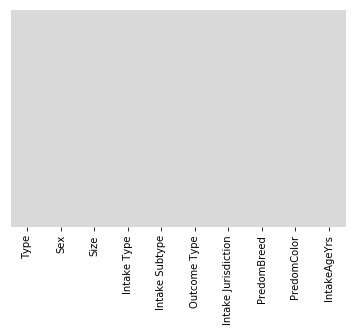

In [11]:
sns.heatmap(df.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')

In [12]:
df.reset_index(drop=True, inplace=True)

## Label Encoding

In [13]:
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures

In [14]:
from collections import defaultdict

In [15]:
d = defaultdict(LabelEncoder)

In [17]:
# Encoding the variable
fit = df.drop(['IntakeAgeYrs'], axis=1).apply(lambda x: d[x.name].fit_transform(x))

# Inverse the encoded
fit.apply(lambda x: d[x.name].inverse_transform(x))

# Using the dictionary to label future data
encoded = df.drop(['IntakeAgeYrs'], axis=1).apply(lambda x: d[x.name].transform(x))

In [18]:
modeling = pd.concat([encoded, df[['IntakeAgeYrs']].copy()], axis=1)

In [19]:
modeling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16457 entries, 0 to 16456
Data columns (total 10 columns):
Type                   16457 non-null int64
Sex                    16457 non-null int64
Size                   16457 non-null int64
Intake Type            16457 non-null int64
Intake Subtype         16457 non-null int64
Outcome Type           16457 non-null int64
Intake Jurisdiction    16457 non-null int64
PredomBreed            16457 non-null int64
PredomColor            16457 non-null int64
IntakeAgeYrs           16457 non-null float64
dtypes: float64(1), int64(9)
memory usage: 1.3 MB


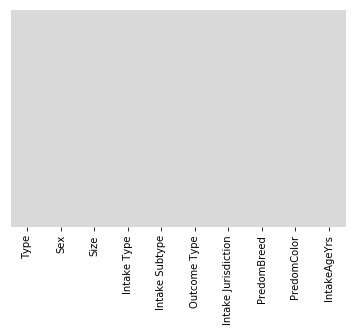

In [20]:
sns.heatmap(modeling.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')

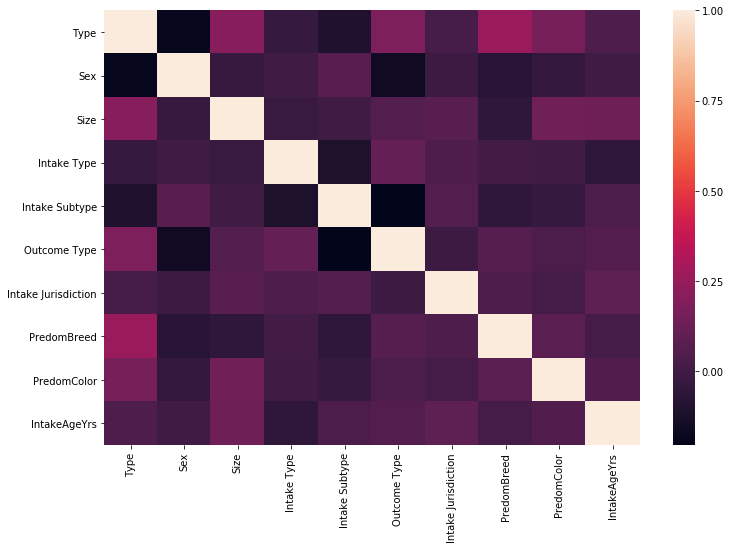

In [21]:
plt.figure(figsize=(12,8))
sns.heatmap(modeling.corr())

## Interaction Features

In [22]:
features = modeling.drop(['Outcome Type'], axis = 1).copy()

In [23]:
poly = PolynomialFeatures(interaction_only=True, include_bias=False)

In [24]:
features = pd.DataFrame(poly.fit_transform(features), columns=poly.get_feature_names(input_features=features.columns))

In [25]:
features.describe()

,Type,Sex,Size,Intake Type,Intake Subtype,Intake Jurisdiction,PredomBreed,PredomColor,IntakeAgeYrs,Type Sex,Type Size,Type Intake Type,Type Intake Subtype,Type Intake Jurisdiction,Type PredomBreed,Type PredomColor,Type IntakeAgeYrs,Sex Size,Sex Intake Type,Sex Intake Subtype,Sex Intake Jurisdiction,Sex PredomBreed,Sex PredomColor,Sex IntakeAgeYrs,Size Intake Type,Size Intake Subtype,Size Intake Jurisdiction,Size PredomBreed,Size PredomColor,Size IntakeAgeYrs,Intake Type Intake Subtype,Intake Type Intake Jurisdiction,Intake Type PredomBreed,Intake Type PredomColor,Intake Type IntakeAgeYrs,Intake Subtype Intake Jurisdiction,Intake Subtype PredomBreed,Intake Subtype PredomColor,Intake Subtype IntakeAgeYrs,Intake Jurisdiction PredomBreed,Intake Jurisdiction PredomColor,Intake Jurisdiction IntakeAgeYrs,PredomBreed PredomColor,PredomBreed IntakeAgeYrs,PredomColor IntakeAgeYrs
count,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000
mean,0.722428,2.066962,2.513642,3.445342,7.663669,9.143890,28.010026,6.928055,2.415546,1.369630,2.020781,2.468858,5.157562,6.621134,22.158656,5.668955,1.844763,5.139697,7.123169,16.312876,18.881570,56.859877,13.967977,5.000982,8.614814,19.270462,23.145531,69.260254,19.044601,6.930347,25.645500,31.566628,96.605092,23.856171,8.073169,70.529015,210.229993,51.600352,19.399173,256.825545,63.462843,22.577950,201.205505,68.294930,18.054690
std,0.592350,1.114992,1.666012,1.100699,6.176820,1.397513,12.599100,7.044173,3.880925,1.627586,2.284181,2.279326,7.098868,5.534907,22.744486,8.642696,3.583111,4.898346,4.669493,16.942358,10.631307,40.974095,17.684853,8.938926,6.631386,23.340894,15.996020,56.944013,25.636332,13.791375,25.467052,11.219241,55.115894,26.664185,14.159105,58.740851,206.177930,79.160656,41.908642,124.665166,66.058703,36.925305,249.102307,121.387912,44.430499
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,0.000000,0.000000,0.000000,-23.000000,0.000000,0.000000,-12.000000,0.000000,-56.000000,-19.000000
25%,0.000000,1.000000,1.000000,4.000000,2.000000,8.000000,21.000000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000,10.000000,30.000000,0.000000,-0.000000,4.000000,2.000000,8.000000,25.000000,0.000000,0.000000,8.000000,30.000000,56.000000,0.000000,0.160000,16.000000,50.000000,0.000000,0.260000,176.000000,0.000000,0.720000,0.000000,1.760000,0.000000
50%,1.000000,2.000000,2.000000,4.000000,5.000000,10.000000,22.000000,2.000000,0.950000,1.000000,1.000000,3.000000,2.000000,8.000000,15.000000,0.000000,0.130000,4.000000,8.000000,6.000000,20.000000,45.000000,4.000000,1.380000,8.000000,8.000000,20.000000,66.000000,6.000000,1.950000,8.000000,32.000000,88.000000,8.000000,2.680000,48.000000,110.000000,18.000000,4.000000,220.000000,20.000000,7.920000,80.000000,20.900000,0.640000
75%,1.000000,3.000000,4.000000,4.000000,13.000000,10.000000,38.000000,15.000000,3.770000,2.000000,4.000000,4.000000,11.000000,10.000000,40.000000,13.000000,2.860000,8.000000,12.000000,26.000000,24.000000,84.000000,27.000000,6.240000,16.000000,36.000000,40.000000,88.000000,36.000000,8.000000,52.000000,40.000000,144.000000,44.000000,11.840000,130.000000,286.000000,45.000000,19.500

In [26]:
modeling = pd.concat([features, modeling['Outcome Type']],axis=1)

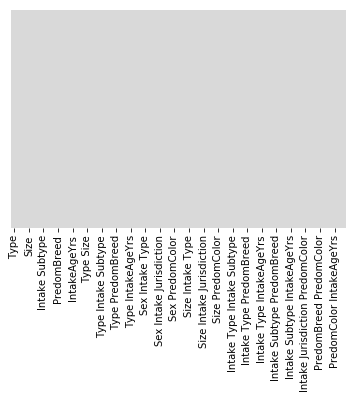

In [27]:
sns.heatmap(modeling.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')

In [28]:
modeling.to_csv('encoded_data_v2.csv')

# Train Test Split

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(modeling.drop('Outcome Type', axis=1), modeling['Outcome Type'], test_size=0.2, random_state=42)

# Over Sampling with SMOTE

In [31]:
from imblearn.over_sampling import SMOTE

In [32]:
sm = SMOTE(sampling_strategy='not majority', random_state=23, n_jobs = -1)
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

In [33]:
unique_elements, counts_elements = np.unique(y_train_sm, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[   0    1    2    3]
 [4495 4495 4495 4495]]


# Models

In [34]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score

## Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

### Without upsampled training data

In [37]:
lr = LogisticRegression(penalty='l2',C=1.0,fit_intercept=False,random_state=10,solver='lbfgs',multi_class='multinomial',verbose=8,n_jobs=-1)

In [38]:
lr.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.9s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=-1, penalty='l2', random_state=10, solver='lbfgs',
          tol=0.0001, verbose=8, warm_start=False)

In [39]:
pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)

In [40]:
print('f1 train: ', f1_score(y_train, pred_train, average='micro'))
print('f1 test: ', f1_score(y_test, pred_test, average='micro'))
print('Accuracy test: ', accuracy_score(y_test, pred_test))

f1 train:  0.5109760729206229
f1 test:  0.5176184690157959
Accuracy test:  0.5176184690157959


Text(42.0, 0.5, 'True Label')

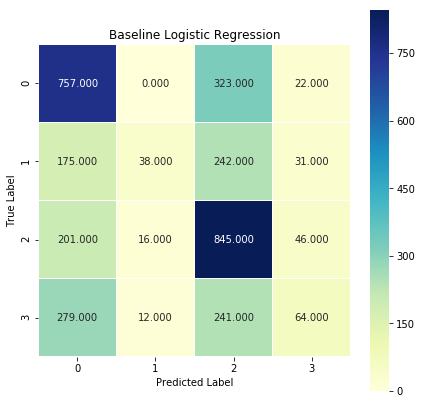

In [41]:
cm_lr = confusion_matrix(y_test, pred_test)

plt.figure(figsize = (7, 7))
sns.heatmap(cm_lr, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu")
plt.title('Baseline Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [42]:
d['Outcome Type'].inverse_transform([0,1,2,3])

array(['ADOPTION', 'EUTHANIZE', 'RETURN TO OWNER', 'TRANSFER'],
      dtype=object)

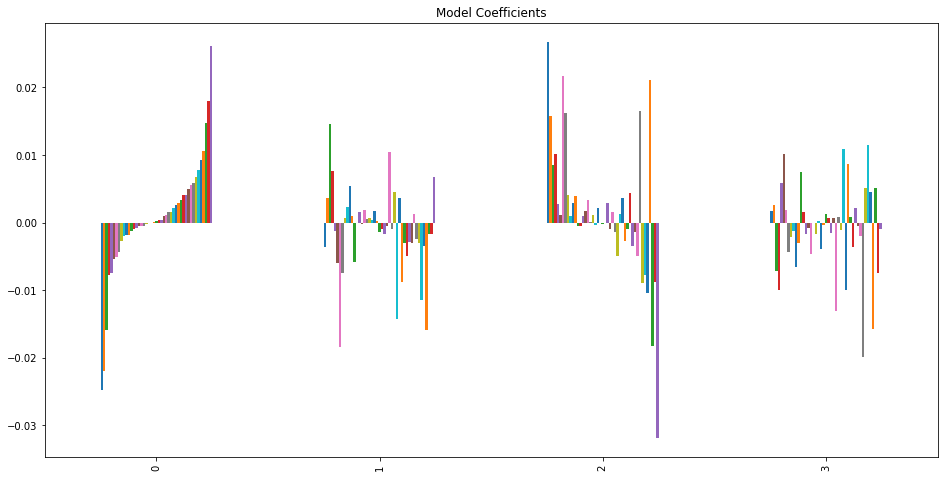

In [43]:
coef = pd.DataFrame(data=lr.coef_ )
coef.columns = features.columns

model_coef = coef.T.sort_values(by=0).T
model_coef.plot(kind='bar', title='Model Coefficients', legend=False, figsize=(16,8),)

### With Upsampled training data

In [44]:
lr_sm = LogisticRegression(penalty='l2',C=1.0,fit_intercept=False,random_state=10,solver='lbfgs',multi_class='multinomial',verbose=8,n_jobs=-1)

In [45]:
lr_sm.fit(X_train_sm,y_train_sm)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.8s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=-1, penalty='l2', random_state=10, solver='lbfgs',
          tol=0.0001, verbose=8, warm_start=False)

In [46]:
pred_train_lrsm = lr_sm.predict(X_train)
pred_test_lrsm = lr_sm.predict(X_test)

In [47]:
print('f1 train: ', f1_score(y_train, pred_train_lrsm, average='micro'))
print('f1 test: ', f1_score(y_test, pred_test_lrsm, average='micro'))
print('Accuracy test: ', accuracy_score(y_test, pred_test_lrsm))


f1 train:  0.4737561716672996
f1 test:  0.479951397326853
Accuracy test:  0.479951397326853


Text(42.0, 0.5, 'True Label')

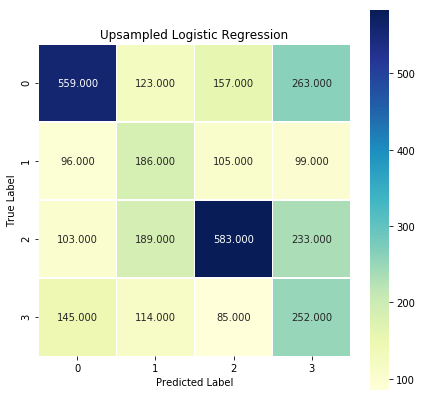

In [48]:
cm_lrsm = confusion_matrix(y_test, pred_test_lrsm)

plt.figure(figsize = (7, 7))
sns.heatmap(cm_lrsm, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu")
plt.title('Upsampled Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

## Decision Tree

In [49]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
dtc = DecisionTreeClassifier()

### Without Upsampling

In [60]:
params = dict(criterion=['gini', 'entropy'],
    max_depth=[9,10,11],
    min_samples_leaf=[.0006,.0007, .0008])

In [61]:
rs_tree = RandomizedSearchCV(dtc, params, cv=10,scoring='accuracy', verbose=5, n_jobs=-1)

In [62]:
rs_tree.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    7.7s finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'criterion': ['gini', 'entropy'], 'max_depth': [9, 10, 11], 'min_samples_leaf': [0.0006, 0.0007, 0.0008]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=5)

In [63]:
rs_tree.best_params_

{'min_samples_leaf': 0.0007, 'max_depth': 10, 'criterion': 'entropy'}

In [64]:
pred_train_tree = rs_tree.best_estimator_.predict(X_train)
pred_test_tree = rs_tree.best_estimator_.predict(X_test)

In [65]:
print('Accuracy train: ', accuracy_score(y_train, pred_train_tree))
print('Accuracy test: ', accuracy_score(y_test, pred_test_tree))

Accuracy train:  0.7220660843144702
Accuracy test:  0.6795261239368166


Text(42.0, 0.5, 'True Label')

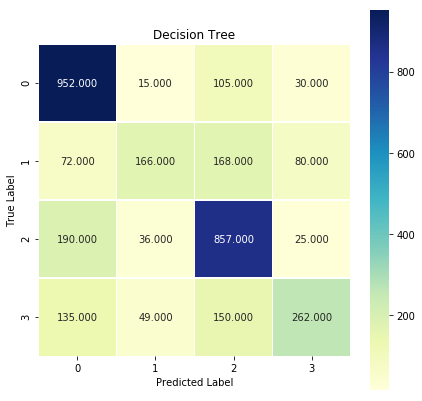

In [66]:
cm_tree = confusion_matrix(y_test, pred_test_tree)

plt.figure(figsize = (7, 7))
sns.heatmap(cm_tree, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu")
plt.title('Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

### With Upsampling

In [71]:
params_sm = dict(criterion=['gini', 'entropy'],
    max_depth=[13,15,17],
    min_samples_leaf=[.0003,.0005,.0007])

In [72]:
rs_tree_sm = RandomizedSearchCV(dtc, params_sm, cv=10,scoring='accuracy', verbose=5, n_jobs=-1)

In [73]:
rs_tree_sm.fit(X_train_sm, y_train_sm)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.8s finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'criterion': ['gini', 'entropy'], 'max_depth': [13, 15, 17], 'min_samples_leaf': [0.0003, 0.0005, 0.0007]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=5)

In [74]:
rs_tree_sm.best_params_

{'min_samples_leaf': 0.0005, 'max_depth': 15, 'criterion': 'gini'}

In [75]:
pred_train_treesm = rs_tree_sm.best_estimator_.predict(X_train)
pred_test_treesm = rs_tree_sm.best_estimator_.predict(X_test)

In [76]:
print('Accuracy train: ', accuracy_score(y_train, pred_train_treesm))
print('Accuracy test: ', accuracy_score(y_test, pred_test_treesm))

Accuracy train:  0.7664261298898595
Accuracy test:  0.6631227217496962


Text(42.0, 0.5, 'True Label')

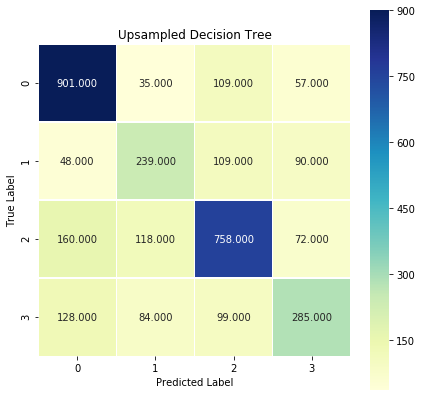

In [77]:
cm_treesm = confusion_matrix(y_test, pred_test_treesm)

plt.figure(figsize = (7, 7))
sns.heatmap(cm_treesm, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu")
plt.title('Upsampled Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [78]:
importances = rs_tree_sm.best_estimator_.feature_importances_

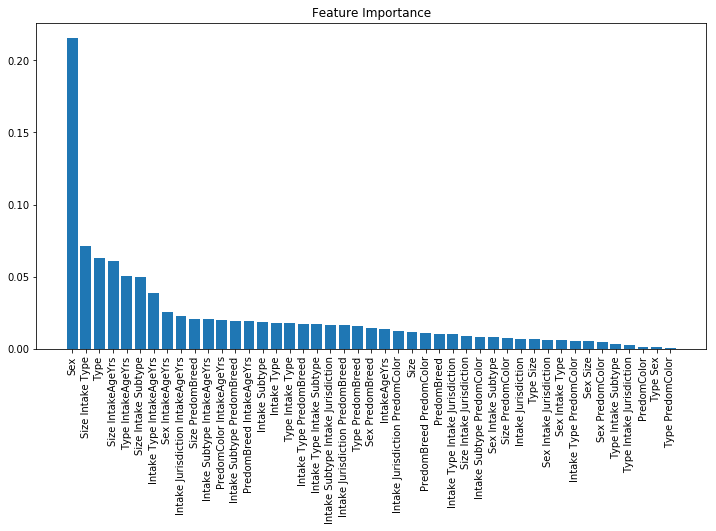

In [79]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [modeling.drop('Outcome Type', axis=1).columns[i] for i in indices]

# Create plot
plt.figure(figsize=(12,6))
# Create plot title
plt.title("Feature Importance")
# Add bars
plt.bar(range(len(modeling.drop('Outcome Type', axis=1).columns)), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(len(modeling.drop('Outcome Type', axis=1).columns)), names, rotation=90)
# Show plot
plt.show()

## KNN

In [80]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
knn = KNeighborsClassifier(n_jobs=-1)

### Without upsampling

In [90]:
params_knn = dict(n_neighbors=[11,13,16],weights=['uniform','distance'],p=[1,2,3])

In [91]:
rs_knn = RandomizedSearchCV(knn, params_knn, cv=10,scoring='accuracy', verbose=5, n_jobs=-1)

In [92]:
rs_knn.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.1min finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform'),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'n_neighbors': [11, 13, 16], 'weights': ['uniform', 'distance'], 'p': [1, 2, 3]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=5)

In [93]:
rs_knn.best_params_

{'weights': 'distance', 'p': 1, 'n_neighbors': 13}

In [94]:
pred_train_knn = rs_knn.best_estimator_.predict(X_train)
pred_test_knn = rs_knn.best_estimator_.predict(X_test)

In [95]:
print('Accuracy train: ', accuracy_score(y_train, pred_train_knn))
print('Accuracy test: ', accuracy_score(y_test, pred_test_knn))

Accuracy train:  0.9671097607292062
Accuracy test:  0.6579586877278251


Text(42.0, 0.5, 'True Label')

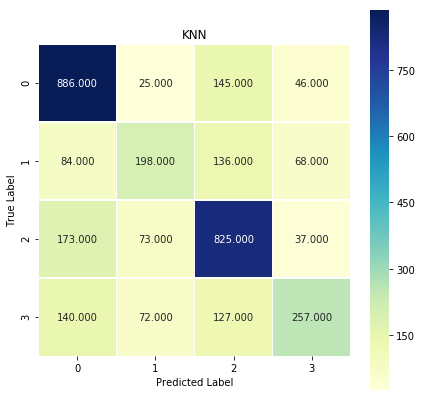

In [96]:
cm_knn = confusion_matrix(y_test, pred_test_knn)

plt.figure(figsize = (7, 7))
sns.heatmap(cm_knn, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu")
plt.title('KNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

### With Upsampling

In [101]:
params_knnsm = dict(n_neighbors=[7,10,13],weights=['uniform','distance'],p=[1,2,3])

In [102]:
rs_knnsm = RandomizedSearchCV(knn, params_knnsm, cv=10,scoring='accuracy', verbose=10, n_jobs=-1)

In [103]:
rs_knnsm.fit(X_train_sm,y_train_sm)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   34.3s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.1min finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform'),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'n_neighbors': [7, 10, 13], 'weights': ['uniform', 'distance'], 'p': [1, 2, 3]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=10)

In [104]:
rs_knnsm.best_params_

{'weights': 'distance', 'p': 1, 'n_neighbors': 10}

In [105]:
pred_train_knnsm = rs_knnsm.best_estimator_.predict(X_train)
pred_test_knnsm = rs_knnsm.best_estimator_.predict(X_test)

In [106]:
print('Accuracy train: ', accuracy_score(y_train, pred_train_knnsm))
print('Accuracy test: ', accuracy_score(y_test, pred_test_knnsm))

Accuracy train:  0.966729965818458
Accuracy test:  0.6318347509113001


Text(42.0, 0.5, 'True Label')

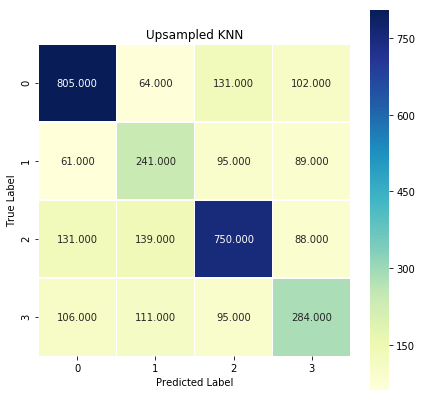

In [107]:
cm_knnsm = confusion_matrix(y_test, pred_test_knnsm)

plt.figure(figsize = (7, 7))
sns.heatmap(cm_knnsm, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu")
plt.title('Upsampled KNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

## Random Forest

In [108]:
from sklearn.ensemble import RandomForestClassifier

In [109]:
rfc = RandomForestClassifier()

### Without Upsampling

In [122]:
params_rfc = dict(n_estimators=[105,110,115],max_depth=[11,12,13],min_samples_leaf=[.00003,.00005,.00007])

In [123]:
rs_rfc = RandomizedSearchCV(rfc, params_rfc, cv=10,scoring='accuracy', verbose=10, n_jobs=-1)

In [124]:
rs_rfc.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   36.2s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   44.1s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   55.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.6min finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': [105, 110, 115], 'max_depth': [11, 12, 13], 'min_samples_leaf': [3e-05, 5e-05, 7e-05]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=10)

In [125]:
rs_rfc.best_params_

{'n_estimators': 115, 'min_samples_leaf': 7e-05, 'max_depth': 11}

In [126]:
pred_train_rfc = rs_rfc.best_estimator_.predict(X_train)
pred_test_rfc = rs_rfc.best_estimator_.predict(X_test)

In [127]:
print('Accuracy train: ', accuracy_score(y_train, pred_train_rfc))
print('Accuracy test: ', accuracy_score(y_test, pred_test_rfc))

Accuracy train:  0.7955184200531713
Accuracy test:  0.7105103280680437


Text(42.0, 0.5, 'True Label')

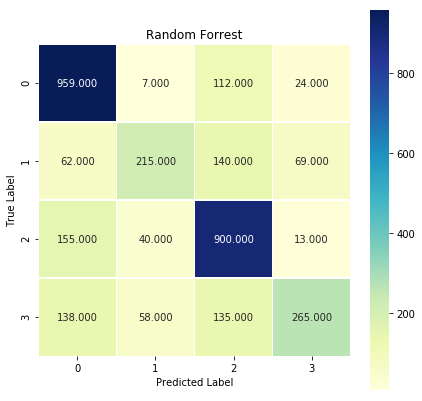

In [128]:
cm_rfc = confusion_matrix(y_test, pred_test_rfc)

plt.figure(figsize = (7, 7))
sns.heatmap(cm_rfc, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu")
plt.title('Random Forrest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [139]:
importance_rfc = rs_rfc.best_estimator_.feature_importances_

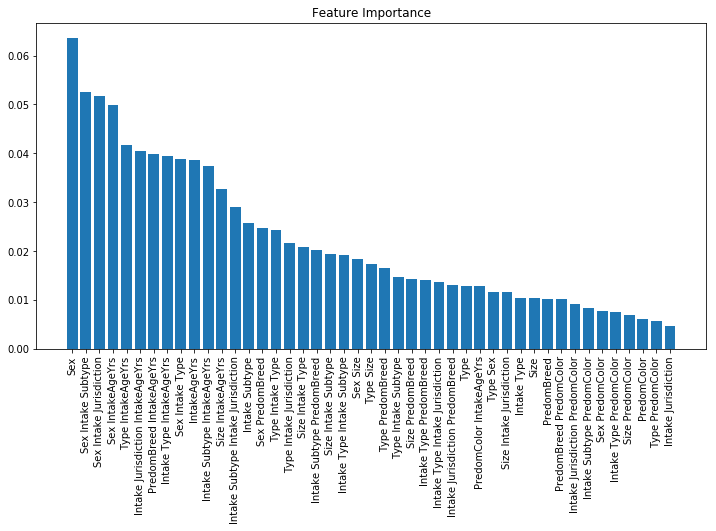

In [140]:


# Sort feature importances in descending order
indices = np.argsort(importance_rfc)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [modeling.drop('Outcome Type', axis=1).columns[i] for i in indices]

# Create plot
plt.figure(figsize=(12,6))
# Create plot title
plt.title("Feature Importance")
# Add bars
plt.bar(range(len(modeling.drop('Outcome Type', axis=1).columns)), importance_rfc[indices])
# Add feature names as x-axis labels
plt.xticks(range(len(modeling.drop('Outcome Type', axis=1).columns)), names, rotation=90)
# Show plot
plt.show()

### With Upsampling

In [142]:
params_rfcsm = dict(n_estimators=[100,150,200],max_depth=[5,10,15],min_samples_leaf=[.00001,.00005,.0001])

In [143]:
rs_rfcsm = RandomizedSearchCV(rfc, params_rfcsm, cv=10,scoring='accuracy', verbose=10, n_jobs=-1)

In [144]:
rs_rfcsm.fit(X_train_sm,y_train_sm)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   37.4s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   50.9s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.7min finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': [100, 150, 200], 'max_depth': [5, 10, 15], 'min_samples_leaf': [1e-05, 5e-05, 0.0001]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=10)

In [145]:
rs_rfcsm.best_params_

{'n_estimators': 100, 'min_samples_leaf': 5e-05, 'max_depth': 15}

In [146]:
pred_train_rfcsm = rs_rfcsm.best_estimator_.predict(X_train)
pred_test_rfcsm = rs_rfcsm.best_estimator_.predict(X_test)

In [147]:
print('Accuracy train: ', accuracy_score(y_train, pred_train_rfcsm))
print('Accuracy test: ', accuracy_score(y_test, pred_test_rfcsm))

Accuracy train:  0.8821116597037599
Accuracy test:  0.7080801944106926


Text(42.0, 0.5, 'True Label')

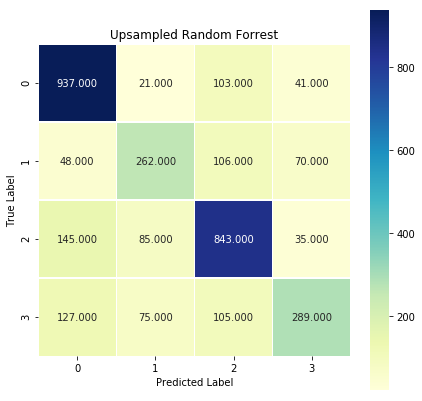

In [148]:
cm_rfcsm = confusion_matrix(y_test, pred_test_rfcsm)

plt.figure(figsize = (7, 7))
sns.heatmap(cm_rfcsm, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu")
plt.title('Upsampled Random Forrest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [149]:
importance_rfcsm = rs_rfcsm.best_estimator_.feature_importances_

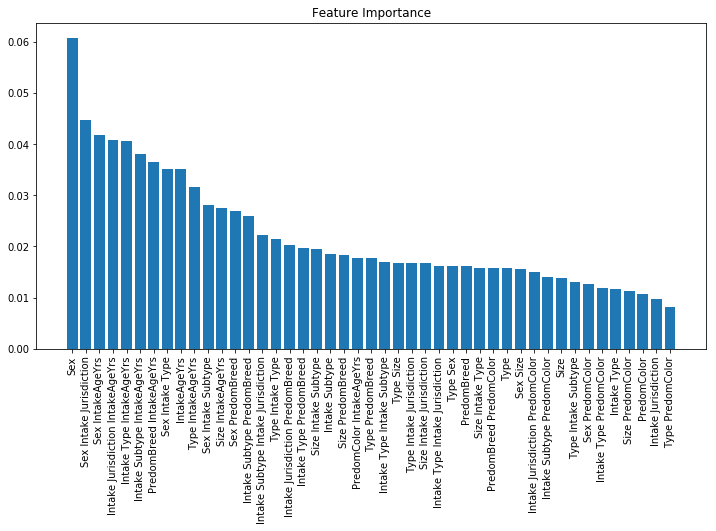

In [150]:
# Sort feature importances in descending order
indices = np.argsort(importance_rfcsm)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [modeling.drop('Outcome Type', axis=1).columns[i] for i in indices]

# Create plot
plt.figure(figsize=(12,6))
# Create plot title
plt.title("Feature Importance")
# Add bars
plt.bar(range(len(modeling.drop('Outcome Type', axis=1).columns)), importance_rfcsm[indices])
# Add feature names as x-axis labels
plt.xticks(range(len(modeling.drop('Outcome Type', axis=1).columns)), names, rotation=90)
# Show plot
plt.show()

In [151]:
names

['Sex',
 'Sex Intake Jurisdiction',
 'Sex IntakeAgeYrs',
 'Intake Jurisdiction IntakeAgeYrs',
 'Intake Type IntakeAgeYrs',
 'Intake Subtype IntakeAgeYrs',
 'PredomBreed IntakeAgeYrs',
 'Sex Intake Type',
 'IntakeAgeYrs',
 'Type IntakeAgeYrs',
 'Sex Intake Subtype',
 'Size IntakeAgeYrs',
 'Sex PredomBreed',
 'Intake Subtype PredomBreed',
 'Intake Subtype Intake Jurisdiction',
 'Type Intake Type',
 'Intake Jurisdiction PredomBreed',
 'Intake Type PredomBreed',
 'Size Intake Subtype',
 'Intake Subtype',
 'Size PredomBreed',
 'PredomColor IntakeAgeYrs',
 'Type PredomBreed',
 'Intake Type Intake Subtype',
 'Type Size',
 'Type Intake Jurisdiction',
 'Size Intake Jurisdiction',
 'Intake Type Intake Jurisdiction',
 'Type Sex',
 'PredomBreed',
 'Size Intake Type',
 'PredomBreed PredomColor',
 'Type',
 'Sex Size',
 'Intake Jurisdiction PredomColor',
 'Intake Subtype PredomColor',
 'Size',
 'Type Intake Subtype',
 'Sex PredomColor',
 'Intake Type PredomColor',
 'Intake Type',
 'Size PredomColor',

## XGBoosted

In [152]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier

In [153]:
xgb = XGBClassifier(objective='multi:softmax',booster='gbtree')

### Without Upsampling

In [154]:
params_xgb = dict(max_depth=[3,5,10],learning_rate=[.05,0.1,.3],n_estimators=[50,100,150])

In [155]:
rs_xgb = RandomizedSearchCV(xgb, params_xgb, cv=10,scoring='accuracy', verbose=10, n_jobs=-1)

In [156]:
rs_xgb.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed: 36.5min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed: 39.0min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 41.6min finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softmax', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'max_depth': [3, 5, 10], 'learning_rate': [0.05, 0.1, 0.3], 'n_estimators': [50, 100, 150]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=10)

In [157]:
rs_xgb.best_params_

{'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.3}

In [158]:
pred_train_xgb = rs_xgb.best_estimator_.predict(X_train)
pred_test_xgb = rs_xgb.best_estimator_.predict(X_test)

In [159]:
print('Accuracy train: ', accuracy_score(y_train, pred_train_xgb))
print('Accuracy test: ', accuracy_score(y_test, pred_test_xgb))

Accuracy train:  0.7921002658564376
Accuracy test:  0.7171931956257594


Text(42.0, 0.5, 'True Label')

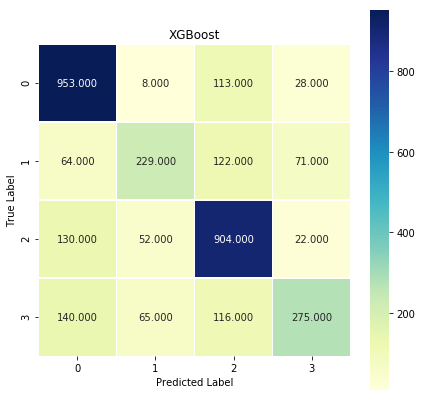

In [160]:
cm_xgb = confusion_matrix(y_test, pred_test_xgb)

plt.figure(figsize = (7, 7))
sns.heatmap(cm_xgb, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu")
plt.title('XGBoost')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [161]:
rs_xgb.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.3, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=50,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [293]:
import pickle

In [294]:
model_pickle_path = 'xgboost_model.pkl'

# Create an variable to pickle and open it in write mode
model_pickle = open(model_pickle_path, 'wb')
pickle.dump(rs_xgb, model_pickle)
model_pickle.close()

In [162]:
importance = rs_xgb.best_estimator_.feature_importances_

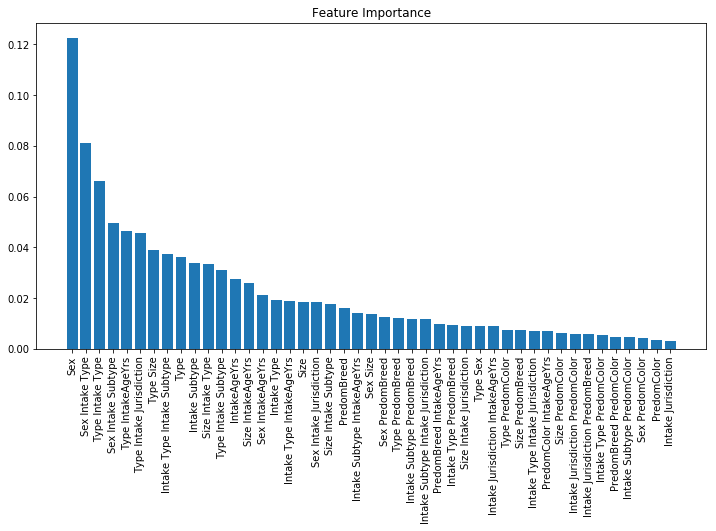

In [163]:
# Sort feature importances in descending order
indices = np.argsort(importance)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [modeling.drop('Outcome Type', axis=1).columns[i] for i in indices]

# Create plot
plt.figure(figsize=(12,6))
# Create plot title
plt.title("Feature Importance")
# Add bars
plt.bar(range(len(modeling.drop('Outcome Type', axis=1).columns)), importance[indices])
# Add feature names as x-axis labels
plt.xticks(range(len(modeling.drop('Outcome Type', axis=1).columns)), names, rotation=90)
# Show plot
plt.show()

In [164]:
list(zip(names,importance[indices]))

[('Sex', 0.1224902),
 ('Sex Intake Type', 0.08123483),
 ('Type Intake Type', 0.066146985),
 ('Sex Intake Subtype', 0.04972475),
 ('Type IntakeAgeYrs', 0.046309218),
 ('Type Intake Jurisdiction', 0.045565933),
 ('Type Size', 0.039044067),
 ('Intake Type Intake Subtype', 0.037515),
 ('Type', 0.03620072),
 ('Intake Subtype', 0.033992335),
 ('Size Intake Type', 0.03330511),
 ('Type Intake Subtype', 0.031242788),
 ('IntakeAgeYrs', 0.027358158),
 ('Size IntakeAgeYrs', 0.025856068),
 ('Sex IntakeAgeYrs', 0.021318113),
 ('Intake Type', 0.019211732),
 ('Intake Type IntakeAgeYrs', 0.018737847),
 ('Size', 0.018614285),
 ('Sex Intake Jurisdiction', 0.018419765),
 ('Size Intake Subtype', 0.017668854),
 ('PredomBreed', 0.015944181),
 ('Intake Subtype IntakeAgeYrs', 0.014237322),
 ('Sex Size', 0.013825426),
 ('Sex PredomBreed', 0.0123731475),
 ('Type PredomBreed', 0.012130408),
 ('Intake Subtype PredomBreed', 0.01163706),
 ('Intake Subtype Intake Jurisdiction', 0.011612326),
 ('PredomBreed IntakeAgeY

In [167]:
bestfeats = names[:27]

### With less features

In [168]:
rs_xgbimp = RandomizedSearchCV(xgb, params_xgb, cv=10,scoring='accuracy', verbose=10, n_jobs=-1)

In [169]:
rs_xgbimp.fit(X_train[bestfeats],y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 10.6min finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softmax', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'max_depth': [3, 5, 10], 'learning_rate': [0.05, 0.1, 0.3], 'n_estimators': [50, 100, 150]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=10)

In [170]:
rs_xgbimp.best_params_

{'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.05}

In [171]:
pred_train_xgbimp = rs_xgbimp.best_estimator_.predict(X_train[bestfeats])
pred_test_xgbimp = rs_xgbimp.best_estimator_.predict(X_test[bestfeats])

In [172]:
print('Accuracy train: ', accuracy_score(y_train, pred_train_xgbimp))
print('Accuracy test: ', accuracy_score(y_test, pred_test_xgbimp))

Accuracy train:  0.8252943410558299
Accuracy test:  0.7144592952612394


Text(42.0, 0.5, 'True Label')

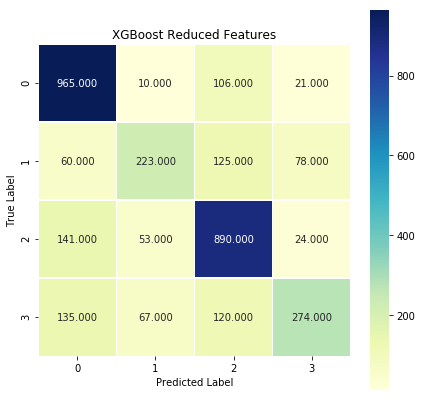

In [173]:
cm_xgbimp = confusion_matrix(y_test, pred_test_xgbimp)

plt.figure(figsize = (7, 7))
sns.heatmap(cm_xgbimp, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu")
plt.title('XGBoost Reduced Features')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

### With Upsampling

In [176]:
import xgboost as xg

In [177]:
data_dmatrix = xg.DMatrix(data=X_train_sm,label=y_train_sm)

In [182]:
params = {"objective":"multi:softmax","num_class":4,'colsample_bytree': 0.3,'learning_rate': 0.2,
                'max_depth': 2, 'alpha': 10}

cv_results = xg.cv(dtrain=data_dmatrix, params=params, nfold=5,num_boost_round=500,early_stopping_rounds=5,
                   metrics="merror", as_pandas=True, seed=123,verbose_eval=5)
cv_results 

[0]	train-merror:0.473902+0.00634602	test-merror:0.476474+0.00471457
[5]	train-merror:0.425097+0.0122741	test-merror:0.427976+0.0158299
[10]	train-merror:0.409872+0.00503104	test-merror:0.411902+0.0100917
[15]	train-merror:0.393131+0.00277071	test-merror:0.396163+0.00922728
[20]	train-merror:0.380979+0.003942	test-merror:0.38515+0.00851688
[25]	train-merror:0.369355+0.00151148	test-merror:0.373637+0.00831956
[30]	train-merror:0.359066+0.00369903	test-merror:0.362681+0.00632526
[35]	train-merror:0.350459+0.00266432	test-merror:0.355117+0.00396399
[40]	train-merror:0.343674+0.00241049	test-merror:0.351057+0.00601218
[45]	train-merror:0.3401+0.00205813	test-merror:0.347664+0.00349276
[50]	train-merror:0.335845+0.00217163	test-merror:0.343382+0.00478887
[55]	train-merror:0.333203+0.00224567	test-merror:0.340378+0.00370171
[60]	train-merror:0.329505+0.00231611	test-merror:0.337598+0.00519383
[65]	train-merror:0.32696+0.0021282	test-merror:0.333927+0.0052096
[70]	train-merror:0.324388+0.0014

,train-merror-mean,train-merror-std,test-merror-mean,test-merror-std
0,0.473902,0.006346,0.476474,0.004715
1,0.452113,0.003426,0.453448,0.004346
2,0.441838,0.009004,0.443604,0.008620
3,0.438654,0.007235,0.440378,0.009891
4,0.434941,0.010069,0.438042,0.012794
5,0.425097,0.012274,0.427976,0.015830
6,0.425723,0.005564,0.425473,0.011047
7,0.419104,0.007427,0.421580,0.011365
8,0.419980,0.005307,0.421635,0.007980
9,0.415545,0.007234,0.418242,0.009666


In [206]:
def modelfit(alg, dtrain, predictors, target, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xg.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xg.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='merror', early_stopping_rounds=early_stopping_rounds,verbose_eval=True)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target],eval_metric='merror')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % accuracy_score(dtrain[target].values, dtrain_predictions))


    return alg

In [207]:
xgbsm = XGBClassifier(objective='multi:softmax',num_class=4,booster='gbtree',learning_rate=.2, max_depth=3,colsample_bytree=.3)

In [191]:
X_train_sm = pd.DataFrame(X_train_sm, columns=X_train.columns)

In [190]:
y_train_sm = pd.DataFrame(y_train_sm, columns = ['Outcome Type'])

In [192]:
train  = pd.concat([X_train_sm, y_train_sm], axis=1)
target = 'Outcome Type'



In [213]:
predictors = [x for x in train.columns if x not in [target]]

In [208]:
alg = modelfit(xgbsm, train, predictors, target, early_stopping_rounds=500)

[0]	train-merror:0.434469+0.00417466	test-merror:0.439878+0.00586355
[1]	train-merror:0.409497+0.00399098	test-merror:0.415406+0.0121996
[2]	train-merror:0.389822+0.00564268	test-merror:0.39416+0.0103014
[3]	train-merror:0.38483+0.00993233	test-merror:0.387486+0.0106044
[4]	train-merror:0.379283+0.00812286	test-merror:0.383204+0.00983171
[5]	train-merror:0.371816+0.0097001	test-merror:0.374861+0.0149103
[6]	train-merror:0.368548+0.00842838	test-merror:0.372747+0.0137373
[7]	train-merror:0.364016+0.00630876	test-merror:0.369411+0.010265
[8]	train-merror:0.359788+0.00380628	test-merror:0.364905+0.00950938
[9]	train-merror:0.356897+0.0028194	test-merror:0.363237+0.00981504
[10]	train-merror:0.352155+0.00384248	test-merror:0.358843+0.00721232
[11]	train-merror:0.350195+0.00398882	test-merror:0.356062+0.00844691
[12]	train-merror:0.347302+0.00308753	test-merror:0.353504+0.0105224
[13]	train-merror:0.346301+0.00355676	test-merror:0.354004+0.0084659
[14]	train-merror:0.343284+0.00346442	test-

In [209]:
list(zip(predictors,alg.feature_importances_))


[('Type', 0.07095063),
 ('Sex', 0.06940115),
 ('Size', 0.020648012),
 ('Intake Type', 0.02890819),
 ('Intake Subtype', 0.037000358),
 ('Intake Jurisdiction', 0.011255267),
 ('PredomBreed', 0.013493103),
 ('PredomColor', 0.005873861),
 ('IntakeAgeYrs', 0.016248645),
 ('Type Sex', 0.022861533),
 ('Type Size', 0.023559999),
 ('Type Intake Type', 0.030922415),
 ('Type Intake Subtype', 0.018450284),
 ('Type Intake Jurisdiction', 0.033302434),
 ('Type PredomBreed', 0.017609376),
 ('Type PredomColor', 0.0046097212),
 ('Type IntakeAgeYrs', 0.027642125),
 ('Sex Size', 0.024423573),
 ('Sex Intake Type', 0.040696424),
 ('Sex Intake Subtype', 0.020710748),
 ('Sex Intake Jurisdiction', 0.070503354),
 ('Sex PredomBreed', 0.026364809),
 ('Sex PredomColor', 0.0046882364),
 ('Sex IntakeAgeYrs', 0.01682976),
 ('Size Intake Type', 0.012418792),
 ('Size Intake Subtype', 0.04117467),
 ('Size Intake Jurisdiction', 0.016430981),
 ('Size PredomBreed', 0.011338909),
 ('Size PredomColor', 0.003972611),
 ('Size 

In [210]:
todrop = ['PredomColor','Type PredomColor','Sex PredomColor','Size PredomColor','Intake Type PredomColor',
          'Intake Type PredomColor','Intake Jurisdiction PredomBreed','Intake Jurisdiction PredomColor',
          'PredomBreed PredomColor','PredomColor IntakeAgeYrs']

In [212]:
train.drop(todrop, axis=1, inplace=True)

In [215]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

gsearch1 = GridSearchCV(estimator = XGBClassifier(objective='multi:softmax',num_class=4,booster='gbtree',
                                    learning_rate=.2,colsample_bytree=.3, n_estimators=99,gamma=0, subsample=0.8, 
                                    nthread=4, scale_pos_weight=1, seed=27), 
                        param_grid = param_test1, scoring='accuracy',n_jobs=-1,iid=False, cv=5,verbose=10)
gsearch1.fit(train[predictors],train[target])

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   41.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  8.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  8.2min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, learning_rate=0.2, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=99,
       n_jobs=1, nthread=4, num_class=4, objective='multi:softmax',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=27, silent=True, subsample=0.8),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'max_depth': range(3, 10, 2), 'min_child_weight': range(1, 6, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=10)

In [217]:
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 9, 'min_child_weight': 1}, 0.7582869855394885)

In [218]:
param_test2 = {
 'max_depth':[8,9,10],
 'min_child_weight':[1,2,3]
}

gsearch2 = GridSearchCV(estimator = XGBClassifier(objective='multi:softmax',num_class=4,booster='gbtree',
                                    learning_rate=.2,colsample_bytree=.3, n_estimators=99,gamma=0, subsample=0.8, 
                                    nthread=4, scale_pos_weight=1, seed=27), 
                        param_grid = param_test2, scoring='accuracy',n_jobs=-1,iid=False, cv=5,verbose=10)
gsearch2.fit(train[predictors],train[target])

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done  43 out of  45 | elapsed:  8.0min remaining:   22.2s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  8.1min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, learning_rate=0.2, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=99,
       n_jobs=1, nthread=4, num_class=4, objective='multi:softmax',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=27, silent=True, subsample=0.8),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'max_depth': [8, 9, 10], 'min_child_weight': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=10)

In [220]:
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 9, 'min_child_weight': 1}, 0.7582869855394885)

In [221]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier(objective='multi:softmax',num_class=4,booster='gbtree',
                                    learning_rate=.2,colsample_bytree=.3, n_estimators=99, subsample=0.8, 
                                    max_depth=9, min_child_weight=1, nthread=4, scale_pos_weight=1, seed=27), 
                        param_grid = param_test3, scoring='accuracy',n_jobs=-1,iid=False, cv=5,verbose=10)
gsearch3.fit(train[predictors],train[target])

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done  21 out of  25 | elapsed:  4.8min remaining:   54.9s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  5.1min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, learning_rate=0.2, max_delta_step=0,
       max_depth=9, min_child_weight=1, missing=None, n_estimators=99,
       n_jobs=1, nthread=4, num_class=4, objective='multi:softmax',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=27, silent=True, subsample=0.8),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=10)

In [222]:
gsearch3.best_params_, gsearch3.best_score_

({'gamma': 0.3}, 0.7593993325917687)

In [230]:
param_test4 = {
 'subsample':[i/100.0 for i in range(85,100,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}

gsearch4 = GridSearchCV(estimator = XGBClassifier(objective='multi:softmax',num_class=4,booster='gbtree',
                                    learning_rate=.2, n_estimators=99, max_depth=9, min_child_weight=1, gamma=.3, 
                                    nthread=4, scale_pos_weight=1, seed=27), 
                        param_grid = param_test4, scoring='accuracy',n_jobs=-1,iid=False, cv=5,verbose=10)
gsearch4.fit(train[predictors],train[target])

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done  43 out of  45 | elapsed: 14.1min remaining:   39.3s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 14.5min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.3, learning_rate=0.2, max_delta_step=0,
       max_depth=9, min_child_weight=1, missing=None, n_estimators=99,
       n_jobs=1, nthread=4, num_class=4, objective='multi:softmax',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=27, silent=True, subsample=1),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'subsample': [0.85, 0.9, 0.95], 'colsample_bytree': [0.75, 0.8, 0.85]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=10)

In [231]:
gsearch4.best_params_, gsearch4.best_score_

({'colsample_bytree': 0.8, 'subsample': 0.9}, 0.7626251390433815)

In [233]:
list(zip(predictors,gsearch4.best_estimator_.feature_importances_))

[('Type', 0.14257233),
 ('Sex', 0.12099125),
 ('Size', 0.026371866),
 ('Intake Type', 0.029227126),
 ('Intake Subtype', 0.046916954),
 ('Intake Jurisdiction', 0.0126442015),
 ('PredomBreed', 0.014712999),
 ('IntakeAgeYrs', 0.018773096),
 ('Type Sex', 0.022275642),
 ('Type Size', 0.02812049),
 ('Type Intake Type', 0.050544254),
 ('Type Intake Subtype', 0.017493447),
 ('Type Intake Jurisdiction', 0.017767258),
 ('Type PredomBreed', 0.018254844),
 ('Type IntakeAgeYrs', 0.026307305),
 ('Sex Size', 0.016664144),
 ('Sex Intake Type', 0.04596772),
 ('Sex Intake Subtype', 0.033043366),
 ('Sex Intake Jurisdiction', 0.023065986),
 ('Sex PredomBreed', 0.013305569),
 ('Sex IntakeAgeYrs', 0.01504627),
 ('Size Intake Type', 0.04047415),
 ('Size Intake Subtype', 0.019636275),
 ('Size Intake Jurisdiction', 0.01549966),
 ('Size PredomBreed', 0.01053878),
 ('Size IntakeAgeYrs', 0.01270691),
 ('Intake Type Intake Subtype', 0.042193145),
 ('Intake Type Intake Jurisdiction', 0.012845059),
 ('Intake Type Pr

In [234]:
param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}

gsearch6 = GridSearchCV(estimator = XGBClassifier(objective='multi:softmax',num_class=4,booster='gbtree',
                                    learning_rate=.2, n_estimators=99, max_depth=9, min_child_weight=1, gamma=.3, 
                                    nthread=4, scale_pos_weight=1, colsample_bytree=0.8, subsample=0.9,seed=27), 
                        param_grid = param_test6, scoring='accuracy',n_jobs=-1,iid=False, cv=5,verbose=10)
gsearch6.fit(train[predictors],train[target])

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done  21 out of  25 | elapsed:  7.8min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  8.5min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0.3, learning_rate=0.2,
       max_delta_step=0, max_depth=9, min_child_weight=1, missing=None,
       n_estimators=99, n_jobs=1, nthread=4, num_class=4,
       objective='multi:softmax', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.9),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'reg_alpha': [1e-05, 0.01, 0.1, 1, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=10)

In [235]:
gsearch6.best_params_, gsearch6.best_score_

({'reg_alpha': 0.1}, 0.7619021134593993)

In [236]:
list(zip(predictors,gsearch6.best_estimator_.feature_importances_))

[('Type', 0.1554035),
 ('Sex', 0.12573722),
 ('Size', 0.026304264),
 ('Intake Type', 0.028798679),
 ('Intake Subtype', 0.04618564),
 ('Intake Jurisdiction', 0.012420694),
 ('PredomBreed', 0.014204435),
 ('IntakeAgeYrs', 0.018682744),
 ('Type Sex', 0.021779163),
 ('Type Size', 0.028746229),
 ('Type Intake Type', 0.045979768),
 ('Type Intake Subtype', 0.018246409),
 ('Type Intake Jurisdiction', 0.017969185),
 ('Type PredomBreed', 0.016319895),
 ('Type IntakeAgeYrs', 0.025855955),
 ('Sex Size', 0.016759248),
 ('Sex Intake Type', 0.042250704),
 ('Sex Intake Subtype', 0.033169832),
 ('Sex Intake Jurisdiction', 0.024067592),
 ('Sex PredomBreed', 0.01284412),
 ('Sex IntakeAgeYrs', 0.014940082),
 ('Size Intake Type', 0.03993287),
 ('Size Intake Subtype', 0.020107795),
 ('Size Intake Jurisdiction', 0.015202151),
 ('Size PredomBreed', 0.010626624),
 ('Size IntakeAgeYrs', 0.011950038),
 ('Intake Type Intake Subtype', 0.04021055),
 ('Intake Type Intake Jurisdiction', 0.013467916),
 ('Intake Type P

In [237]:
param_test7 = {
 'reg_alpha':[0.005, 0.01, 0.05, 0.1, 0.15]
}

gsearch7 = GridSearchCV(estimator = XGBClassifier(objective='multi:softmax',num_class=4,booster='gbtree',
                                    learning_rate=.2, n_estimators=99, max_depth=9, min_child_weight=1, gamma=.3, 
                                    nthread=4, scale_pos_weight=1, colsample_bytree=0.8, subsample=0.9,seed=27), 
                        param_grid = param_test7, scoring='accuracy',n_jobs=-1,iid=False, cv=5,verbose=10)
gsearch7.fit(train[predictors],train[target])

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done  21 out of  25 | elapsed:  8.0min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  8.4min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0.3, learning_rate=0.2,
       max_delta_step=0, max_depth=9, min_child_weight=1, missing=None,
       n_estimators=99, n_jobs=1, nthread=4, num_class=4,
       objective='multi:softmax', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.9),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'reg_alpha': [0.005, 0.01, 0.05, 0.1, 0.15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=10)

In [238]:
gsearch7.best_params_, gsearch7.best_score_

({'reg_alpha': 0.005}, 0.7620689655172413)

In [239]:
param_test8 = {
 'reg_alpha':[0,0.001, 0.005]
}

gsearch8 = GridSearchCV(estimator = XGBClassifier(objective='multi:softmax',num_class=4,booster='gbtree',
                                    learning_rate=.2, n_estimators=99, max_depth=9, min_child_weight=1, gamma=.3, 
                                    nthread=4, scale_pos_weight=1, colsample_bytree=0.8, subsample=0.9,seed=27), 
                        param_grid = param_test8, scoring='accuracy',n_jobs=-1,iid=False, cv=5,verbose=10)
gsearch8.fit(train[predictors],train[target])

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:  4.4min remaining:  2.2min
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:  4.5min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  5.3min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0.3, learning_rate=0.2,
       max_delta_step=0, max_depth=9, min_child_weight=1, missing=None,
       n_estimators=99, n_jobs=1, nthread=4, num_class=4,
       objective='multi:softmax', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.9),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'reg_alpha': [0, 0.001, 0.005]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=10)

In [240]:
gsearch8.best_params_, gsearch8.best_score_

({'reg_alpha': 0}, 0.7626251390433815)

In [242]:
xgb2=XGBClassifier(objective='multi:softmax',num_class=4,booster='gbtree',learning_rate=.05, n_estimators=5000, 
    max_depth=9, min_child_weight=1, gamma=.3, reg_alpha=0,nthread=4, scale_pos_weight=1, colsample_bytree=0.8, 
    subsample=0.9,seed=27)

modelfit(xgb2, train, predictors,target)

[0]	train-merror:0.255061+0.00227989	test-merror:0.308343+0.00586618
[1]	train-merror:0.242158+0.00124174	test-merror:0.30039+0.00882793
[2]	train-merror:0.238432+0.00255173	test-merror:0.29683+0.00937695
[3]	train-merror:0.234316+0.00415818	test-merror:0.295551+0.00952246
[4]	train-merror:0.231368+0.00384034	test-merror:0.291657+0.0103639
[5]	train-merror:0.230353+0.00323793	test-merror:0.29099+0.0096662
[6]	train-merror:0.22881+0.00401899	test-merror:0.29149+0.0102349
[7]	train-merror:0.227656+0.00368939	test-merror:0.290601+0.0101872
[8]	train-merror:0.226683+0.0034108	test-merror:0.291101+0.00994052
[9]	train-merror:0.225778+0.00325204	test-merror:0.289766+0.0105367
[10]	train-merror:0.22468+0.00297142	test-merror:0.287486+0.0114381
[11]	train-merror:0.223206+0.00256761	test-merror:0.286874+0.0108797
[12]	train-merror:0.222066+0.00223926	test-merror:0.285706+0.0104043
[13]	train-merror:0.220356+0.00258186	test-merror:0.285206+0.0104015
[14]	train-merror:0.219007+0.00248485	test-mer

[119]	train-merror:0.134844+0.00110324	test-merror:0.249499+0.010307
[120]	train-merror:0.134247+0.00120008	test-merror:0.248887+0.0105026
[121]	train-merror:0.133857+0.00128608	test-merror:0.248999+0.0100706
[122]	train-merror:0.133412+0.00134088	test-merror:0.248721+0.0102833
[123]	train-merror:0.1328+0.00142456	test-merror:0.248554+0.00963538
[124]	train-merror:0.132508+0.00140616	test-merror:0.24861+0.00980495
[125]	train-merror:0.131924+0.00117622	test-merror:0.24822+0.00961509
[126]	train-merror:0.131299+0.0012239	test-merror:0.248443+0.00982033
[127]	train-merror:0.131076+0.00127036	test-merror:0.248053+0.00979258
[128]	train-merror:0.130729+0.00140796	test-merror:0.248053+0.0100835
[129]	train-merror:0.130409+0.00135319	test-merror:0.248387+0.00979138
[130]	train-merror:0.129839+0.00126728	test-merror:0.248053+0.00978469
[131]	train-merror:0.129185+0.00107306	test-merror:0.248276+0.0100933
[132]	train-merror:0.128685+0.00124614	test-merror:0.247942+0.010083
[133]	train-merror:0

[236]	train-merror:0.0874028+0.00154721	test-merror:0.239711+0.0081267
[237]	train-merror:0.0870968+0.00150905	test-merror:0.239989+0.00825506
[238]	train-merror:0.0867492+0.00157382	test-merror:0.240156+0.00797208
[239]	train-merror:0.0862904+0.00139006	test-merror:0.240044+0.00813507
[240]	train-merror:0.0859706+0.00140477	test-merror:0.239766+0.00819943
[241]	train-merror:0.0855532+0.00150644	test-merror:0.239655+0.00839693
[242]	train-merror:0.0853448+0.00143988	test-merror:0.239488+0.00871854
[243]	train-merror:0.0849972+0.00140551	test-merror:0.239321+0.00903782
[244]	train-merror:0.084747+0.00124935	test-merror:0.239266+0.00911957
[245]	train-merror:0.0842326+0.00108109	test-merror:0.239266+0.00895533
[246]	train-merror:0.0838988+0.00120977	test-merror:0.239155+0.00877816
[247]	train-merror:0.0835512+0.0011172	test-merror:0.239155+0.00870919
[248]	train-merror:0.0832034+0.00110317	test-merror:0.239377+0.00862607
[249]	train-merror:0.082995+0.00130549	test-merror:0.239322+0.00835

[351]	train-merror:0.059594+0.000930018	test-merror:0.237653+0.0066614
[352]	train-merror:0.0594412+0.00106335	test-merror:0.237653+0.00661946
[353]	train-merror:0.0592326+0.00111685	test-merror:0.237486+0.00669244
[354]	train-merror:0.0591352+0.0011421	test-merror:0.237542+0.00699408
[355]	train-merror:0.0589404+0.00109407	test-merror:0.237486+0.00682738
[356]	train-merror:0.0586484+0.00100334	test-merror:0.237931+0.0068106
[357]	train-merror:0.058412+0.00101463	test-merror:0.237542+0.00679196
[358]	train-merror:0.0583008+0.00105865	test-merror:0.237486+0.00654055
[359]	train-merror:0.0581478+0.00103834	test-merror:0.237653+0.00673297
[360]	train-merror:0.0580786+0.00101871	test-merror:0.23743+0.0064534
[361]	train-merror:0.0579256+0.000918829	test-merror:0.237542+0.00614915
[362]	train-merror:0.0575782+0.00103051	test-merror:0.237375+0.00642989
[363]	train-merror:0.0574388+0.00112719	test-merror:0.237653+0.0067901
[364]	train-merror:0.0573554+0.00115326	test-merror:0.237764+0.0068341

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0.3, learning_rate=0.05,
       max_delta_step=0, max_depth=9, min_child_weight=1, missing=None,
       n_estimators=340, n_jobs=1, nthread=4, num_class=4,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.9)

In [247]:
xgb2.fit(X_train_sm[predictors],y_train_sm)

/Users/samantha/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/samantha/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, learning_rate=0.2, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, num_class=4, objective='multi:softprob',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [250]:
pred_train_xgbsm = gsearch8.best_estimator_.predict(X_train_sm[predictors])
pred_test_xgbsm = gsearch8.best_estimator_.predict(X_test[predictors])

In [251]:
print('Accuracy train: ', accuracy_score(y_train_sm, pred_train_xgbsm))
print('Accuracy test: ', accuracy_score(y_test, pred_test_xgbsm))

Accuracy train:  0.9388765294771969
Accuracy test:  0.7178007290400972


Text(42.0, 0.5, 'True Label')

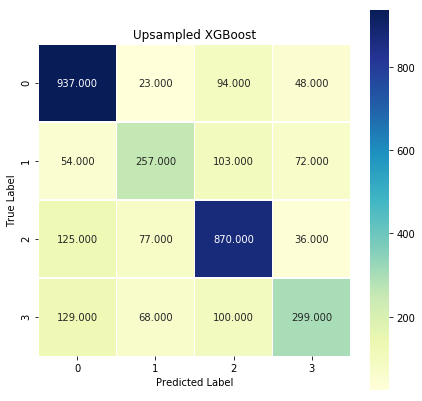

In [252]:
cm_xgbsm = confusion_matrix(y_test, pred_test_xgbsm)

plt.figure(figsize = (7, 7))
sns.heatmap(cm_xgbsm, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu")
plt.title('Upsampled XGBoost')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

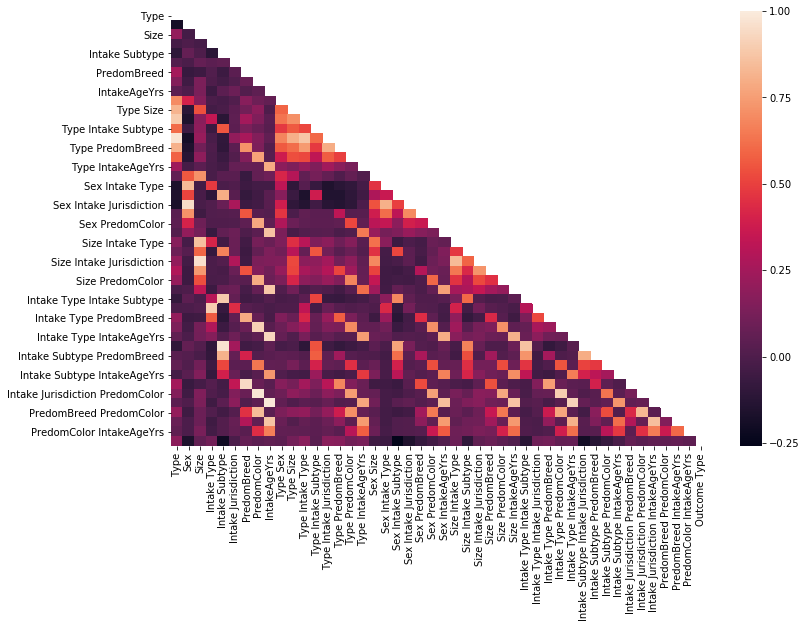

In [174]:
plt.figure(figsize=(12,8))
mask = np.zeros_like(modeling.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(modeling.corr(), mask=mask)

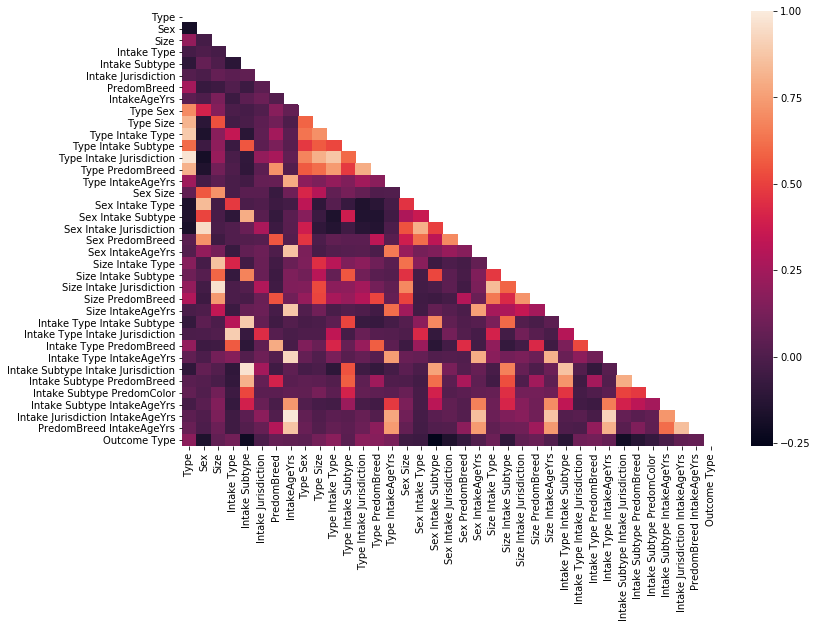

In [253]:
plt.figure(figsize=(12,8))
mask = np.zeros_like(modeling.drop(todrop, axis=1).corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(modeling.drop(todrop, axis=1).corr(), mask=mask)